In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.estimators import MaximumLikelihoodEstimator

## Using the Cleaned Dataset from Previous Assignment

In [2]:
df = pd.read_csv(r"C:\Users\Dhruv\Downloads\diabetes_cleaned.csv")

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.110000e+02,711.000000,711.000000,711.000000,7.110000e+02,711.000000,711.000000,711.000000,711.000000
mean,3.880450e+00,121.579466,72.216596,21.198312,8.472996e+01,32.231927,0.471821,33.355837,0.338959
std,3.353123e+00,30.520629,11.564068,15.337106,1.175142e+02,6.484079,0.325855,11.755069,0.473689
min,1.000000e-09,44.000000,38.000000,0.000000,1.000000e-09,18.200000,0.078000,21.000000,0.000000
25%,1.000000e+00,99.500000,64.000000,0.000000,1.000000e-09,27.400000,0.245000,24.000000,0.000000
50%,3.000000e+00,117.000000,72.000000,24.000000,4.800000e+01,32.200000,0.378000,29.000000,0.000000
75%,6.000000e+00,141.000000,80.000000,33.000000,1.320000e+02,36.500000,0.625000,41.000000,1.000000
max,1.700000e+01,199.000000,108.000000,60.000000,8.460000e+02,52.300000,2.329000,81.000000,1.000000


In [4]:
print(df.memory_usage(deep=True))

Index                        132
Pregnancies                 5688
Glucose                     5688
BloodPressure               5688
SkinThickness               5688
Insulin                     5688
BMI                         5688
DiabetesPedigreeFunction    5688
Age                         5688
Outcome                     5688
dtype: int64


In [13]:
print(df.dtypes)

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness                 int64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object


## Downcasting Values to Reduce Overall Storage in RAM

In [5]:
for col in df.select_dtypes(include=['int']).columns:
    df[col] = pd.to_numeric(df[col], downcast='integer')  # It will convert int64 -> int8

In [6]:
for col in df.select_dtypes(include=['float']).columns:
    df[col] = pd.to_numeric(df[col], downcast='float') # It will convert float64 -> float32

## Implementing Bayesian Network

In [7]:
model = BayesianNetwork([('Outcome','Pregnancies'),('Outcome','BloodPressure'),('Outcome','SkinThickness'),('Outcome','Insulin'),\
                         ('Glucose','Outcome'),('BMI','Outcome'),('DiabetesPedigreeFunction','Outcome'),('Age','Outcome')])

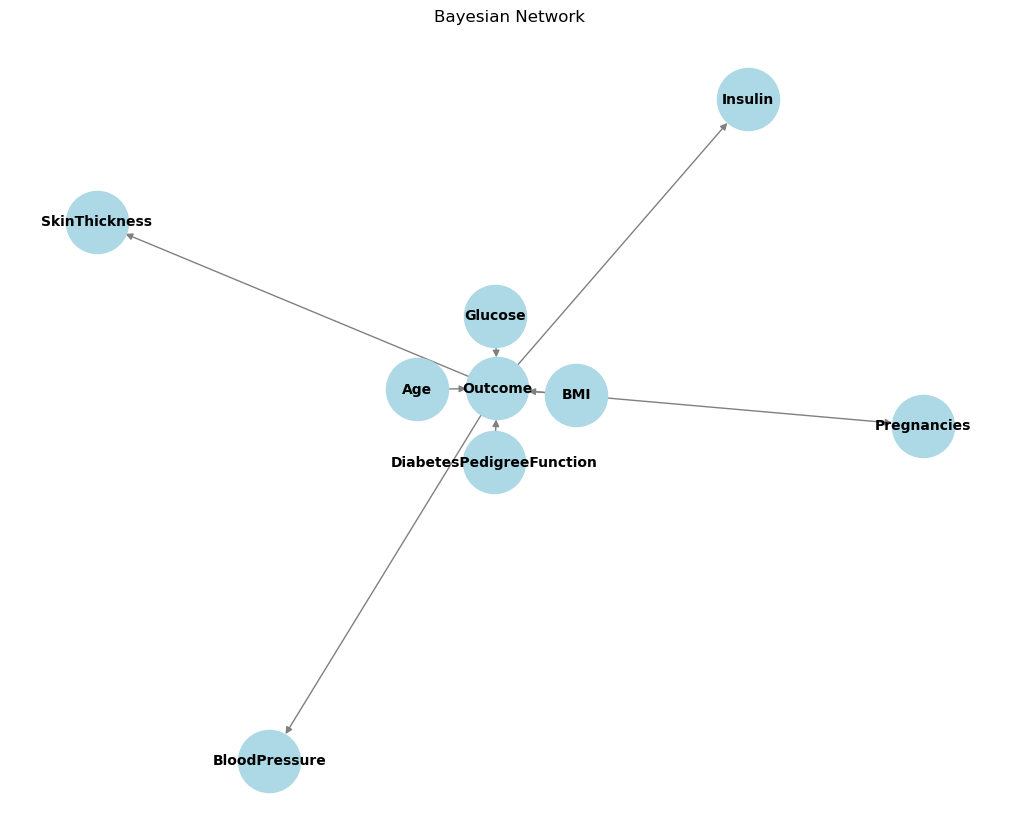

In [9]:
G = nx.DiGraph()
G.add_edges_from(model.edges())

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title("Bayesian Network")
plt.show()

In [8]:
sample_df = df.sample(frac=0.1, random_state=42)   #took only subset(10%) of data due to low hardware resources
model.fit(sample_df, estimator=MaximumLikelihoodEstimator, n_jobs=-1)

## Inferencing Bayesian Model

In [10]:
HeartDiseasetest_infer = VariableElimination(model)

In [11]:
q1=HeartDiseasetest_infer.query(variables=['Outcome'],evidence={'Age':41})

In [12]:
print(q1)

+------------+----------------+
| Outcome    |   phi(Outcome) |
+============+================+
| Outcome(0) |         0.5000 |
+------------+----------------+
| Outcome(1) |         0.5000 |
+------------+----------------+


In [14]:
q2=HeartDiseasetest_infer.query(variables=['BloodPressure'],evidence={'Outcome':1})

In [16]:
print(q2)

+----------------------+----------------------+
| BloodPressure        |   phi(BloodPressure) |
+======================+======================+
| BloodPressure(50.0)  |               0.0000 |
+----------------------+----------------------+
| BloodPressure(52.0)  |               0.0370 |
+----------------------+----------------------+
| BloodPressure(54.0)  |               0.0370 |
+----------------------+----------------------+
| BloodPressure(56.0)  |               0.0370 |
+----------------------+----------------------+
| BloodPressure(62.0)  |               0.0000 |
+----------------------+----------------------+
| BloodPressure(64.0)  |               0.0370 |
+----------------------+----------------------+
| BloodPressure(66.0)  |               0.0370 |
+----------------------+----------------------+
| BloodPressure(68.0)  |               0.0741 |
+----------------------+----------------------+
| BloodPressure(70.0)  |               0.0000 |
+----------------------+----------------

In [17]:
q3=HeartDiseasetest_infer.query(variables=['BloodPressure'],evidence={'Outcome':0})
print(q3)

+----------------------+----------------------+
| BloodPressure        |   phi(BloodPressure) |
+======================+======================+
| BloodPressure(50.0)  |               0.0455 |
+----------------------+----------------------+
| BloodPressure(52.0)  |               0.0227 |
+----------------------+----------------------+
| BloodPressure(54.0)  |               0.0455 |
+----------------------+----------------------+
| BloodPressure(56.0)  |               0.0000 |
+----------------------+----------------------+
| BloodPressure(62.0)  |               0.1136 |
+----------------------+----------------------+
| BloodPressure(64.0)  |               0.0455 |
+----------------------+----------------------+
| BloodPressure(66.0)  |               0.0000 |
+----------------------+----------------------+
| BloodPressure(68.0)  |               0.0682 |
+----------------------+----------------------+
| BloodPressure(70.0)  |               0.1818 |
+----------------------+----------------

In [18]:
q4=HeartDiseasetest_infer.query(variables=['Insulin'],evidence={'Outcome':1})
print(q4)

+--------------------------------+----------------+
| Insulin                        |   phi(Insulin) |
+================================+================+
| Insulin(9.999999717180685e-10) |         0.6296 |
+--------------------------------+----------------+
| Insulin(45.0)                  |         0.0000 |
+--------------------------------+----------------+
| Insulin(46.0)                  |         0.0000 |
+--------------------------------+----------------+
| Insulin(50.0)                  |         0.0000 |
+--------------------------------+----------------+
| Insulin(53.0)                  |         0.0000 |
+--------------------------------+----------------+
| Insulin(64.0)                  |         0.0000 |
+--------------------------------+----------------+
| Insulin(71.0)                  |         0.0000 |
+--------------------------------+----------------+
| Insulin(78.0)                  |         0.0000 |
+--------------------------------+----------------+
| Insulin(90

In [19]:
q5=HeartDiseasetest_infer.query(variables=['Outcome'],evidence={'Glucose':117})
print(q5)

+------------+----------------+
| Outcome    |   phi(Outcome) |
+============+================+
| Outcome(0) |         0.5000 |
+------------+----------------+
| Outcome(1) |         0.5000 |
+------------+----------------+
